<h1> Quora question pair similarity</h1>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")
import sys
import os 
import pandas as pd
import numpy as np
from tqdm import tqdm

# exctract word2vec vectors
# https://github.com/explosion/spaCy/issues/1721
# http://landinghub.visualstudio.com/visual-cpp-build-tools
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

<h2> 1. Loading Data</h2>

In [0]:
df1=pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
df1=df1[0:40000]


In [0]:
df2=pd.read_csv("nlp_features_train.csv",encoding='latin-1')
df2=df2[0:40000]
df2=df2.drop(['qid1','qid2','question1','question2'],axis=1)

In [0]:
df1  = df1.merge(df2, on='id',how='left')
df1 = df1.replace(np.nan, '', regex=True)

In [0]:
y = df1['is_duplicate_x'].values
df1.drop(['is_duplicate_x'], axis=1, inplace=True)
df1['question1'] = df1['question1'].apply(lambda x: str(x))
df1['question2'] = df1['question2'].apply(lambda x: str(x))

<h2>2. Splitting data into Train and Test</h2>

In [0]:
X = df1
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [0]:
X_train1=X_train[['id','freq_qid1','freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words','word_Common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2','is_duplicate_y', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min','ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len','token_set_ratio', 'token_sort_ratio', 'fuzz_ratio','fuzz_partial_ratio', 'longest_substr_ratio']]
X_train2=X_train[['id','freq_qid1','freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words','word_Common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2','is_duplicate_y', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min','ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len','token_set_ratio', 'token_sort_ratio', 'fuzz_ratio','fuzz_partial_ratio', 'longest_substr_ratio']]
X_test1=X_test[['id','freq_qid1','freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words','word_Common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2','is_duplicate_y', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min','ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len','token_set_ratio', 'token_sort_ratio', 'fuzz_ratio','fuzz_partial_ratio', 'longest_substr_ratio']]
X_test2=X_test[['id','freq_qid1','freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words','word_Common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2','is_duplicate_y', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min','ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len','token_set_ratio', 'token_sort_ratio', 'fuzz_ratio','fuzz_partial_ratio', 'longest_substr_ratio']]


<h2>3. Vectorizing Text Features</h2>

In [0]:
#I'm making use of the code from the sample assignment and second assignment
vectorizer = TfidfVectorizer(min_df=5)
vectorizer.fit(X_train['question1'].values)
# we use the fitted CountVectorizer to convert the text to vector
X_train_question1_tfidf = vectorizer.transform(X_train['question1'].values)
X_test_question1_tfidf = vectorizer.transform(X_test['question1'].values)
print("After tfidf vectorizations:question1")
print(X_train_question1_tfidf.shape, y_train.shape)
print(X_test_question1_tfidf.shape, y_test.shape)
print("="*100)

After tfidf vectorizations:question1
(28000, 4801) (28000,)
(12000, 4801) (12000,)


In [0]:
#I'm making use of the code from the sample assignment and second assignment
vectorizer = TfidfVectorizer(min_df=5)
vectorizer.fit(X_train['question2'].values)
# we use the fitted CountVectorizer to convert the text to vector
X_train_question2_tfidf = vectorizer.transform(X_train['question2'].values)
X_test_question2_tfidf = vectorizer.transform(X_test['question2'].values)
print("After tfidf vectorizations:question2")
print(X_train_question2_tfidf.shape, y_train.shape)
print(X_test_question2_tfidf.shape, y_test.shape)
print("="*100)

After tfidf vectorizations:question2
(28000, 4745) (28000,)
(12000, 4745) (12000,)


<h2>4 . Preparing Set-1</h2>

In [0]:
X_train_question1_tfidf=pd.DataFrame(X_train_question1_tfidf.toarray())
X_test_question1_tfidf=pd.DataFrame(X_test_question1_tfidf.toarray())
X_train_question2_tfidf=pd.DataFrame(X_train_question2_tfidf.toarray())
X_test_question2_tfidf=pd.DataFrame(X_test_question2_tfidf.toarray())

In [0]:
X_train_question1_tfidf["id"]=X_train1["id"].values
X_train_question2_tfidf["id"]=X_train1["id"].values

X_test_question1_tfidf["id"]=X_test1["id"].values
X_test_question2_tfidf["id"]=X_test1["id"].values

In [0]:
X_train1  = X_train1.merge(X_train_question1_tfidf, on='id',how='left')
X_train1  = X_train1.merge(X_train_question2_tfidf, on='id',how='left')
X_test1 = X_test1.merge(X_test_question1_tfidf, on='id',how='left')
X_test1 = X_test1.merge(X_test_question2_tfidf, on='id',how='left')

In [0]:
X_train1.drop(['id','is_duplicate_y'], axis=1, inplace=True)
X_test1.drop(['id','is_duplicate_y'], axis=1, inplace=True)

In [0]:
print("Number of data points in train data :",X_train1.shape)
print("Number of data points in test data :",X_test1.shape)

Number of data points in train data : (28000, 9572)
Number of data points in test data : (12000, 9572)


In [0]:
from collections import Counter
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in test data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6277142857142857 Class 1:  0.3722857142857143
---------- Distribution of output variable in test data ----------
Class 0:  0.37225 Class 1:  0.37225


In [0]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

<h2>4. Building a random model (Finding worst-case log-loss)</h2>

<p>We are trying to buid an Random model because to set an upper limit to our loss.
  As  logg loss can go from 0 to infinity to avoid this we are building a random model. which means any of our models log loss score must be less than the score of our random model and greater than zero

Log loss on Test Data using Random Model 0.8903189881621673


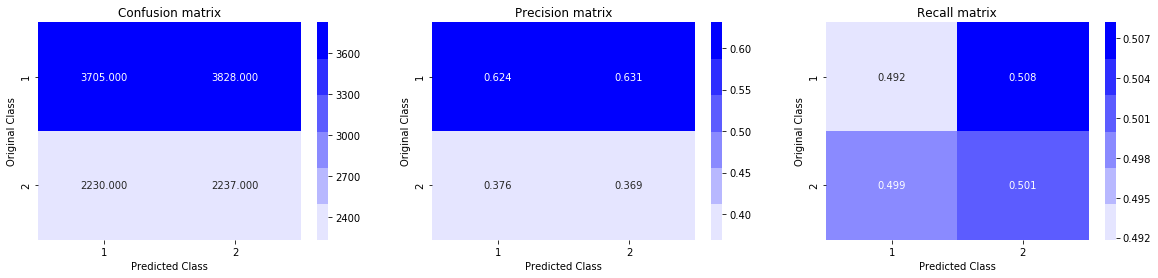

In [0]:
from sklearn.metrics.classification import accuracy_score, log_loss
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

**Observation:**


1.   Log loss of the Random model is 0.89
2.   which means that any model that we take now should be between 0 to 0.89



<h2>5. Logistic Regression with hyperparameter tuning for Set-1</h2>

For values of alpha =  1e-05 The log loss is: 0.4606761510234318
For values of alpha =  0.0001 The log loss is: 0.46383756163373513
For values of alpha =  0.001 The log loss is: 0.4594723668904141
For values of alpha =  0.01 The log loss is: 0.4620482648633433
For values of alpha =  0.1 The log loss is: 0.458334834349055
For values of alpha =  1 The log loss is: 0.49436899008659657
For values of alpha =  10 The log loss is: 0.5449354833015054


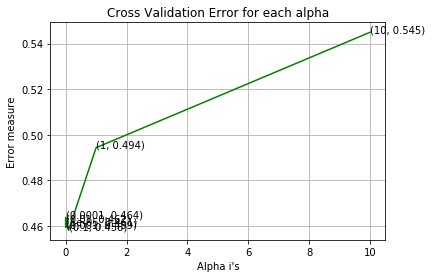

For values of best alpha =  0.1 The train log loss is: 0.4564962975235125
For values of best alpha =  0.1 The test log loss is: 0.458334834349055
Total number of data points : 12000


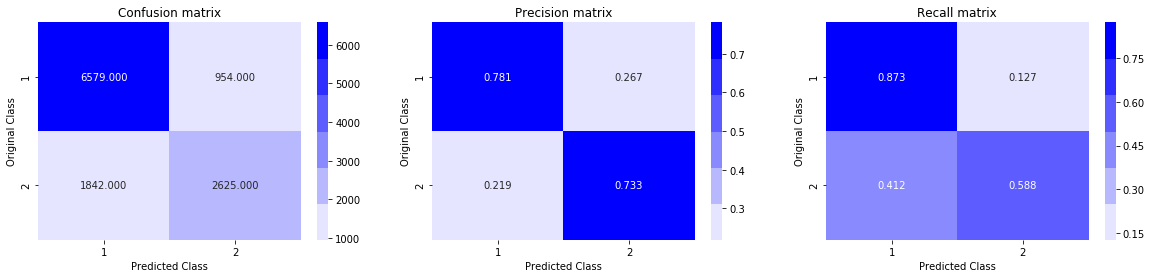

In [0]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train1, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train1, y_train)
    predict_y = sig_clf.predict_proba(X_test1)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train1, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train1, y_train)

predict_y = sig_clf.predict_proba(X_train1)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test1)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

**Observations:**


1.   From the above block we got to know that the best value of alpha is 0.1
2.   With that alpha we trained our model.
3.   the test score we got is 0.45 which is certainly between 0 to 0.89 which is a good sign
4.   based on the scores of train and test loss we can say that we are npt underfitting



<h2>5. Linear SVM with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.48035805581179125
For values of alpha =  0.0001 The log loss is: 0.4791580086023243
For values of alpha =  0.001 The log loss is: 0.4830668813149456
For values of alpha =  0.01 The log loss is: 0.4831828802941518
For values of alpha =  0.1 The log loss is: 0.47569671328279095
For values of alpha =  1 The log loss is: 0.5859768504590218
For values of alpha =  10 The log loss is: 0.6066935737524384


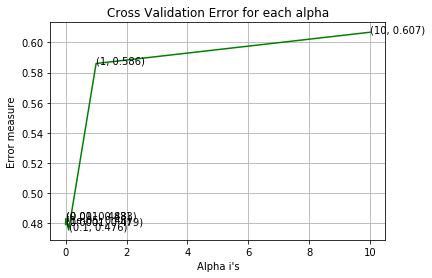

For values of best alpha =  0.1 The train log loss is: 0.4745570887296791
For values of best alpha =  0.1 The test log loss is: 0.47569671328279095
Total number of data points : 12000


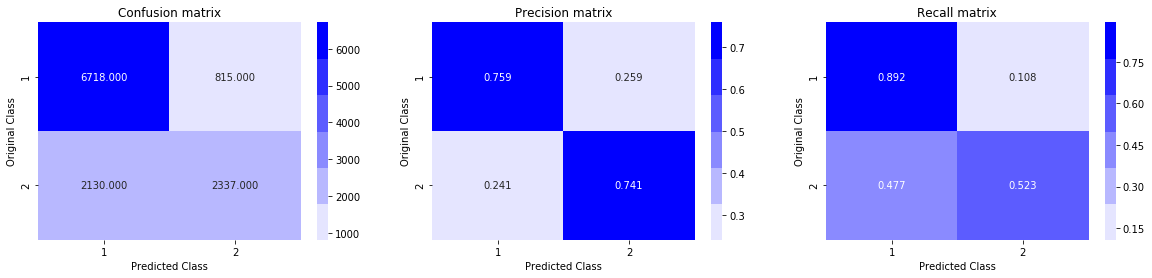

In [0]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train1, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train1, y_train)
    predict_y = sig_clf.predict_proba(X_test1)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train1, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train1, y_train)

predict_y = sig_clf.predict_proba(X_train1)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test1)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

**Observations:**


1.   From the above block we got to know that the best value of alpha is 0.1
2.   With that alpha we trained our model.
3.   the test score we got is 0.47 which is certainly between 0 to 0.89 which is a good sign
4.   based on the scores of train and test loss we can say that we are npt underfitting



<h2>6. Preparing Set-2</h2>

In [0]:
questions = list(X_train['question1']) + list(X_train['question2'])
tfidf = TfidfVectorizer(lowercase=False, )
tfidf.fit_transform(questions)
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))
def fun1(col):
  df = pd.DataFrame() #creates a new dataframe that's empty
  nlp = spacy.load('en_core_web_sm')
  vec2=[]
  vecs1 = []
  for qu1 in list(col): # for each review/sentence
    doc1 = nlp(qu1) 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1: # for each word in a review/sentence
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
  df['q1_feats_m'] = list(vecs1)
  return df

In [0]:
X_train_question1_tfidf_w2v = fun1(X_train['question1'].values)
X_test_question1_tfidf_w2v = fun1(X_test['question1'].values)
X_train_question2_tfidf_w2v = fun1(X_train['question2'].values)
X_test_question2_tfidf_w2v = fun1(X_test['question2'].values)

In [0]:
X_train_question1_tfidf_w2v = pd.DataFrame(X_train_question1_tfidf_w2v.q1_feats_m.values.tolist(), index= X_train_question1_tfidf_w2v.index)

In [0]:
X_test_question1_tfidf_w2v = pd.DataFrame(X_test_question1_tfidf_w2v.q1_feats_m.values.tolist(), index= X_test_question1_tfidf_w2v.index)
X_train_question2_tfidf_w2v = pd.DataFrame(X_train_question2_tfidf_w2v.q1_feats_m.values.tolist(), index= X_train_question2_tfidf_w2v.index)
X_test_question2_tfidf_w2v = pd.DataFrame(X_test_question2_tfidf_w2v.q1_feats_m.values.tolist(), index= X_test_question2_tfidf_w2v.index)

In [0]:
X_train_question1_tfidf_w2v.drop(['id'],axis=1, inplace=True)
X_train_question2_tfidf_w2v.drop(['id'],axis=1, inplace=True)
X_test_question1_tfidf_w2v.drop(['id'],axis=1, inplace=True)
X_test_question2_tfidf_w2v.drop(['id'],axis=1, inplace=True)

In [0]:
X_train_question1_tfidf_w2v["id"]=X_train2["id"].values
X_train_question2_tfidf_w2v["id"]=X_train2["id"].values

X_test_question1_tfidf_w2v["id"]=X_test2["id"].values
X_test_question2_tfidf_w2v["id"]=X_test2["id"].values

In [0]:
X_train2  = X_train2.merge(X_train_question1_tfidf_w2v, on='id',how='left')
X_train2  = X_train2.merge(X_train_question2_tfidf_w2v, on='id',how='left')

X_test2=X_test2.merge(X_test_question1_tfidf_w2v, on='id',how='left')
X_test2=X_test2.merge(X_test_question2_tfidf_w2v, on='id',how='left')

In [0]:
X_train2.drop(['id','is_duplicate_y'], axis=1, inplace=True)
X_test2.drop(['id','is_duplicate_y'], axis=1, inplace=True)

In [0]:
print("Final Data matrix for Set-2 For XGboost is")
print(X_train2.shape, y_train.shape)
print(X_test2.shape, y_test.shape)
print("="*100)

Final Data matrix for Set-2 For XGboost is
(28000, 794) (28000,)
(12000, 794) (12000,)


<h2>7. XGBoost with RandomizedSearchCV to Tune Hyperparameters</h2>

<h3>7.1 Finding hyperpameters</h3>

In [0]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
clf = xgb.XGBClassifier()
param_grid = {
        'max_depth': [1,3,4,5],
        'learning_rate': [0.1, 0.2, 0,3],
        'n_estimators': [1,16,64,100,200]}
rs_clf = GridSearchCV(clf, param_grid,
                            verbose=15,
                            scoring='neg_log_loss')
rs_clf.fit(X_train2, y_train)

In [54]:
# Please compare all your models using Prettytable library
# pretty table http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
train_loss= rs_clf.cv_results_['mean_train_score']
cv_loss = rs_clf.cv_results_['mean_test_score']
train_loss=np.around(train_loss, decimals=2, out=None)
cv_loss = np.around(cv_loss, decimals=2, out=None)
x = PrettyTable()
ittr=0
i=0
j=0
k=0
l=0
m=0
while(ittr<60):
  x.field_names = ["learning_rate", "max_depth","n_estimators","Train Log Loss","CV Log Loss"]
  x.add_row([param_grid["learning_rate"][l],param_grid["max_depth"][m],param_grid["n_estimators"][k],train_loss[ittr],cv_loss[ittr]])
  i=i+1
  j=j+1
  k=k+1
  ittr=ittr+1
  if(j>=5):
    j=0
    m=m+1
    if(i>=20):
      m=0
  if(i>=20):
    i=0
    l=l+1
  if(k>=5):
    k=0
print(x)


+---------------+-----------+--------------+----------------+-------------+
| learning_rate | max_depth | n_estimators | Train Log Loss | CV Log Loss |
+---------------+-----------+--------------+----------------+-------------+
|      0.1      |     1     |      1       |     -0.67      |    -0.67    |
|      0.1      |     1     |      16      |     -0.52      |    -0.52    |
|      0.1      |     1     |      64      |     -0.44      |    -0.44    |
|      0.1      |     1     |     100      |     -0.42      |    -0.42    |
|      0.1      |     1     |     200      |      -0.4      |     -0.4    |
|      0.1      |     3     |      1       |     -0.66      |    -0.66    |
|      0.1      |     3     |      16      |     -0.45      |    -0.45    |
|      0.1      |     3     |      64      |     -0.37      |    -0.38    |
|      0.1      |     3     |     100      |     -0.34      |    -0.37    |
|      0.1      |     3     |     200      |      -0.3      |    -0.36    |
|      0.1  

<h3>7.2 Training the model with Best Hyperparameters</h3> 

For values of best Hyperparameter The train log loss is: 0.3382014919883852
For values of best Hyperparameters The test log loss is: 0.36619040305402745
Total number of data points : 12000


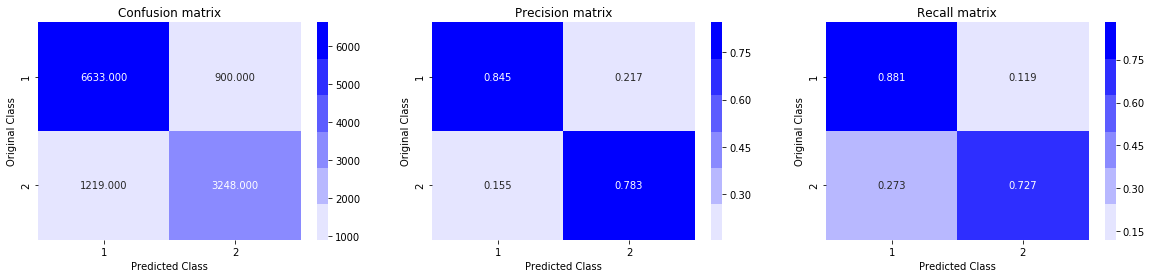

In [63]:
best_max_depth=3
best_n_estimators=64
learning_rate=0.2
neigh=xgb.XGBClassifier(max_depth=best_max_depth,learning_rate=learning_rate,n_estimators=best_n_estimators);
neigh.fit(X_train2,y_train)
sig_clf = CalibratedClassifierCV(neigh, method="sigmoid")
sig_clf.fit(X_train2, y_train)

predict_y = sig_clf.predict_proba(X_train2)
print("For values of best Hyperparameter The train log loss is:",log_loss(y_train, predict_y, labels=neigh.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test2)
print("For values of best Hyperparameters The test log loss is:",log_loss(y_test, predict_y, labels=neigh.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

**Observations:**


1.   From the above block we got to know that the best value of our hyperparameters
2.   With that alpha we trained our model.
3.   The test score we got is 0.36 which is certainly between 0 to 0.89 which is a good sign
4.   based on the scores of train and test loss we can say that we are not underfitting



<h2>8. Conclusion

In [64]:
# pretty table http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyperparameters"," Test Logg Loss"]
x.add_row(["TFIDF", "Logistic Regression","0.1(alpha)",0.458])
x.add_row(["TFIDF", "Linear SVM","0.1(alpha)",0.475])
x.add_row(["TFIDF WEIGHTED W2V", "XGBoost","0.2(learning_rate)\n3(max_depth)\n64(n_estimators)",0.366])
print(x)

+--------------------+---------------------+--------------------+-----------------+
|     Vectorizer     |        Model        |  Hyperparameters   |  Test Logg Loss |
+--------------------+---------------------+--------------------+-----------------+
|       TFIDF        | Logistic Regression |     0.1(alpha)     |      0.458      |
|       TFIDF        |      Linear SVM     |     0.1(alpha)     |      0.475      |
| TFIDF WEIGHTED W2V |       XGBoost       | 0.2(learning_rate) |      0.366      |
|                    |                     |    3(max_depth)    |                 |
|                    |                     |  64(n_estimators)  |                 |
+--------------------+---------------------+--------------------+-----------------+


## Final Observations:


1.   We have two sets of data the first set is TFIDF encoding of Question features
2.   The second set of feathers are the weighted TFIDF word2vec Representation of questions
3.   We trained a random model to make a upper limit for our log loss and it came out to be 0.89
4.   With this we had a interval between 0 to 0.89.
5.   Our logistic Regression for our set1 test loss came out to be 0.458
6.   Our linear Svm  for our set1 test loss came out to be 0.475
7.   Our XgBoost for our set1 test loss came out to be 0.366 at the best hyperparametrs
8.   Best thing is that there is no big difference between the loss of our train and test data which says that we are not overfitting
